# The DeepDream Experiments 

This notebook is inspirated and associated with the [Google DeepDream algorithm](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html),[DeepDream | Tensorflow](https://www.tensorflow.org/tutorials/generative/deepdream?hl=zh-cn) and [pytorch-deepdream by Aleksa Gordić](https://github.com/gordicaleksa/pytorch-deepdream/blob/master/deepdream.py) !


**A problem I haven't solved**

But I failed to use the tensorflow core, It always show that the 'keras' is mot defined, although I have check that the version of my tensorflow, make sure that the offical tensorflow contain the keras- gpu, and I have tried several version, it still does not work, so I back to pytorch to work on my project.


**Main Part**

In this project I'll be focusing on CNN: the VGG16.

In [17]:
#This project is inspirated by Google DeepDream algorithm and pytorch-deepdream by Aleksa Gordić

import os
import enum
from collections import namedtuple
import argparse
import numbers
import math

import torch
import torch.nn as nn
from torchvision import models
from torchvision import transforms
import torch.nn.functional as F


import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#This part created by Aleksa Gordić

class SupportedPretrainedWeights(enum.Enum):
    IMAGENET = 0
    PLACES_365 = 1
    

class SupportedModels(enum.Enum):
    VGG16_EXPERIMENTAL = 0,
    RESNET50 = 1
    
DATA_DIR_PATH = os.path.join(os.getcwd(), 'data')
INPUT_DATA_PATH = os.path.join(DATA_DIR_PATH, 'input')
BINARIES_PATH = os.path.join(os.getcwd(), 'models', 'binaries')
OUT_IMAGES_PATH = os.path.join(DATA_DIR_PATH, 'out-images')


os.makedirs(BINARIES_PATH, exist_ok=True)
os.makedirs(OUT_IMAGES_PATH, exist_ok=True)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


IMAGENET_MEAN_1 = np.array([0.485, 0.456, 0.406], dtype=np.float32)
IMAGENET_STD_1 = np.array([0.229, 0.224, 0.225], dtype=np.float32)



In [19]:
class Vgg16Experimental(torch.nn.Module):
    
    def __init__(self, pretrained_weights, requires_grad=False, show_progress=False):
        super().__init__()


        if pretrained_weights == SupportedPretrainedWeights.IMAGENET.name:
            vgg16 = models.vgg16(pretrained=True, progress=show_progress).eval()
        else:
            raise Exception(f'Pretrained weights {pretrained_weights} not yet supported for {self.__class__.__name__} model.')
        
        # https://github.com/pytorch/vision/blob/master/torchvision/models/vgg.py
        vgg_pretrained_features = vgg16.features


        self.layer_names = ['relu3_3', 'relu4_1', 'relu4_2', 'relu4_3', 'relu5_1', 'relu5_2', 'relu5_3', 'mp5']


        self.conv1_1 = vgg_pretrained_features[0]
        self.relu1_1 = vgg_pretrained_features[1]
        self.conv1_2 = vgg_pretrained_features[2]
        self.relu1_2 = vgg_pretrained_features[3]
        self.max_pooling1 = vgg_pretrained_features[4]
        self.conv2_1 = vgg_pretrained_features[5]
        self.relu2_1 = vgg_pretrained_features[6]
        self.conv2_2 = vgg_pretrained_features[7]
        self.relu2_2 = vgg_pretrained_features[8]
        self.max_pooling2 = vgg_pretrained_features[9]
        self.conv3_1 = vgg_pretrained_features[10]
        self.relu3_1 = vgg_pretrained_features[11]
        self.conv3_2 = vgg_pretrained_features[12]
        self.relu3_2 = vgg_pretrained_features[13]
        self.conv3_3 = vgg_pretrained_features[14]
        self.relu3_3 = vgg_pretrained_features[15]
        self.max_pooling3 = vgg_pretrained_features[16]
        self.conv4_1 = vgg_pretrained_features[17]
        self.relu4_1 = vgg_pretrained_features[18]
        self.conv4_2 = vgg_pretrained_features[19]
        self.relu4_2 = vgg_pretrained_features[20]
        self.conv4_3 = vgg_pretrained_features[21]
        self.relu4_3 = vgg_pretrained_features[22]
        self.max_pooling4 = vgg_pretrained_features[23]
        self.conv5_1 = vgg_pretrained_features[24]
        self.relu5_1 = vgg_pretrained_features[25]
        self.conv5_2 = vgg_pretrained_features[26]
        self.relu5_2 = vgg_pretrained_features[27]
        self.conv5_3 = vgg_pretrained_features[28]
        self.relu5_3 = vgg_pretrained_features[29]
        self.max_pooling5 = vgg_pretrained_features[30]

        if not requires_grad:
            for param in self.parameters():
                param.requires_grad = False

    def forward(self, x):
        x = self.conv1_1(x)
        conv1_1 = x
        x = self.relu1_1(x)
        relu1_1 = x
        x = self.conv1_2(x)
        conv1_2 = x
        x = self.relu1_2(x)
        relu1_2 = x
        x = self.max_pooling1(x)
        x = self.conv2_1(x)
        conv2_1 = x
        x = self.relu2_1(x)
        relu2_1 = x
        x = self.conv2_2(x)
        conv2_2 = x
        x = self.relu2_2(x)
        relu2_2 = x
        x = self.max_pooling2(x)
        x = self.conv3_1(x)
        conv3_1 = x
        x = self.relu3_1(x)
        relu3_1 = x
        x = self.conv3_2(x)
        conv3_2 = x
        x = self.relu3_2(x)
        relu3_2 = x
        x = self.conv3_3(x)
        conv3_3 = x
        x = self.relu3_3(x)
        relu3_3 = x
        x = self.max_pooling3(x)
        x = self.conv4_1(x)
        conv4_1 = x
        x = self.relu4_1(x)
        relu4_1 = x
        x = self.conv4_2(x)
        conv4_2 = x
        x = self.relu4_2(x)
        relu4_2 = x
        x = self.conv4_3(x)
        conv4_3 = x
        x = self.relu4_3(x)
        relu4_3 = x
        x = self.max_pooling4(x)
        x = self.conv5_1(x)
        conv5_1 = x
        x = self.relu5_1(x)
        relu5_1 = x
        x = self.conv5_2(x)
        conv5_2 = x
        x = self.relu5_2(x)
        relu5_2 = x
        x = self.conv5_3(x)
        conv5_3 = x
        x = self.relu5_3(x)
        relu5_3 = x
        mp5 = self.max_pooling5(x)

        vgg_outputs = namedtuple("VggOutputs", self.layer_names)
        out = vgg_outputs(relu3_3, relu4_1, relu4_2, relu4_3, relu5_1, relu5_2, relu5_3, mp5)

        return out
    
    
def fetch_and_prepare_model(model_type, pretrained_weights):
    if model_type == SupportedModels.VGG16_EXPERIMENTAL.name:
        model = Vgg16Experimental(pretrained_weights, requires_grad=False, show_progress=True).to(DEVICE)
    elif model_type == SupportedModels.RESNET50.name:
        model = ResNet50(pretrained_weights, requires_grad=False, show_progress=True).to(DEVICE)
    else:
        raise Exception('Model not yet supported.')
    return model

**Exposing neural network VGG16**   

In [20]:
#This part created by Aleksa Gordić
def load_image(img_path, target_shape=None):
    if not os.path.exists(img_path):
        raise Exception(f'Path does not exist: {img_path}')
    img = cv.imread(img_path)[:, :, ::-1]  

    if target_shape is not None:  
        if isinstance(target_shape, int) and target_shape != -1: 
            current_height, current_width = img.shape[:2]
            new_width = target_shape
            new_height = int(current_height * (new_width / current_width))
            img = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_CUBIC)
        else:  
            img = cv.resize(img, (target_shape[1], target_shape[0]), interpolation=cv.INTER_CUBIC)

    
    img = img.astype(np.float32)  
    img /= 255.0  
    return img



def save_and_maybe_display_image(config, dump_img, name_modifier=None):
    assert isinstance(dump_img, np.ndarray), f'Expected numpy array got {type(dump_img)}.'

   
    dump_dir = config['dump_dir']
    os.makedirs(dump_dir, exist_ok=True)

    
    if name_modifier is not None:
        dump_img_name = str(name_modifier).zfill(6) + '.jpg'
    else:
        dump_img_name = build_image_name(config)

    if dump_img.dtype != np.uint8:
        dump_img = (dump_img*255).astype(np.uint8)

    
    dump_path = os.path.join(dump_dir, dump_img_name)
    cv.imwrite(dump_path, dump_img[:, :, ::-1])

    
    if config['should_display']:
        fig = plt.figure(figsize=(7.5,5), dpi=100)  
        plt.imshow(dump_img)
        plt.show()

    return dump_path



def build_image_name(config):
    input_name = 'rand_noise' if config['use_noise'] else config['input'].split('.')[0]
    layers = '_'.join(config['layers_to_use'])
    
    img_name = f'{input_name}_width_{config["img_width"]}_model_{config["model_name"]}_{config["pretrained_weights"]}_{layers}_pyrsize_{config["pyramid_size"]}_pyrratio_{config["pyramid_ratio"]}_iter_{config["num_gradient_ascent_iterations"]}_lr_{config["lr"]}_shift_{config["spatial_shift_size"]}_smooth_{config["smoothing_coefficient"]}.jpg'
    return img_name

**Image loading- changable**   

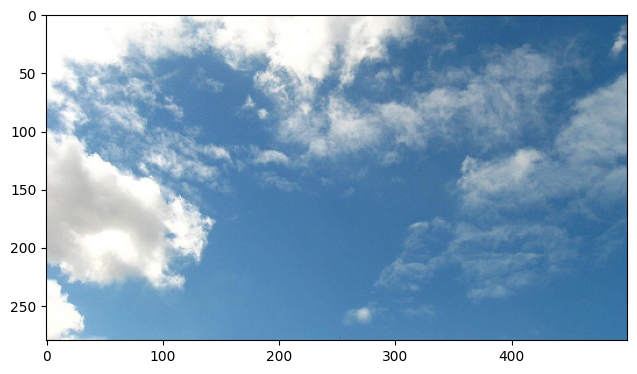

In [21]:
input_img_name = 'Cloud.jpg'  # checked in, I'll be using it as the running example
img_width = 500  # arbitrary
img_path = os.path.join(INPUT_DATA_PATH, input_img_name)
img = load_image(img_path, target_shape=img_width)

fig = plt.figure(figsize=(7.5,5), dpi=100)  # otherwise plots are really small in Jupyter Notebook
plt.imshow(img)
plt.show()

In [22]:
#This part created by Google DeepDream
def pre_process_numpy_img(img):
    assert isinstance(img, np.ndarray), f'Expected numpy image got {type(img)}'

    img = (img - IMAGENET_MEAN_1) / IMAGENET_STD_1  
    return img


def post_process_numpy_img(img):
    assert isinstance(img, np.ndarray), f'Expected numpy image got {type(img)}'

    if img.shape[0] == 3:  
        img = np.moveaxis(img, 0, 2)

    mean = IMAGENET_MEAN_1.reshape(1, 1, -1)
    std = IMAGENET_STD_1.reshape(1, 1, -1)
    img = (img * std) + mean  
    img = np.clip(img, 0., 1.)  

    return img


def pytorch_input_adapter(img):
    
    tensor = transforms.ToTensor()(img).to(DEVICE).unsqueeze(0)
    tensor.requires_grad = True  
    return tensor


def pytorch_output_adapter(tensor):
    
    return np.moveaxis(tensor.to('cpu').detach().numpy()[0], 0, 2)



def random_circular_spatial_shift(tensor, h_shift, w_shift, should_undo=False):
    if should_undo:
        h_shift = -h_shift
        w_shift = -w_shift
    with torch.no_grad():
        rolled = torch.roll(tensor, shifts=(h_shift, w_shift), dims=(2, 3))
        rolled.requires_grad = True
        return rolled

In [23]:
#This part created by Aleksa Gordić
def get_new_shape(config, original_shape, current_pyramid_level):
    SHAPE_MARGIN = 10
    pyramid_ratio = config['pyramid_ratio']
    pyramid_size = config['pyramid_size']
    exponent = current_pyramid_level - pyramid_size + 1  
    new_shape = np.round(np.float32(original_shape) * (pyramid_ratio**exponent)).astype(np.int32)

    if new_shape[0] < SHAPE_MARGIN or new_shape[1] < SHAPE_MARGIN:
        print(f'Pyramid size {config["pyramid_size"]} with pyramid ratio {config["pyramid_ratio"]} gives too small pyramid levels with size={new_shape}')
        print(f'Please change the parameters.')
        exit(0)

    return new_shape

In [24]:
def deep_dream_static_image(config, img=None):
    model = fetch_and_prepare_model(config['model_name'], config['pretrained_weights'])

    try:
        layer_ids_to_use = [model.layer_names.index(layer_name) for layer_name in config['layers_to_use']]
    except Exception as e: 
        print(f'Invalid layer names {[layer_name for layer_name in config["layers_to_use"]]}.')
        print(f'Available layers for model {config["model_name"]} are {model.layer_names}.')
        return

    if img is None:  
        img_path = os.path.join(INPUT_DATA_PATH, config['input'])
        
        img = load_image(img_path, target_shape=config['img_width'])
        if config['use_noise']:
            shape = img.shape
            img = np.random.uniform(low=0.0, high=1.0, size=shape).astype(np.float32)

    img = pre_process_numpy_img(img)
    original_shape = img.shape[:-1]  

    
    for pyramid_level in range(config['pyramid_size']):
        new_shape = get_new_shape(config, original_shape, pyramid_level)
        img = cv.resize(img, (new_shape[1], new_shape[0]))  
        input_tensor = pytorch_input_adapter(img)  

        for iteration in range(config['num_gradient_ascent_iterations']):
            
            
            h_shift, w_shift = np.random.randint(-config['spatial_shift_size'], config['spatial_shift_size'] + 1, 2)
            input_tensor = random_circular_spatial_shift(input_tensor, h_shift, w_shift)

            
            gradient_ascent(config, model, input_tensor, layer_ids_to_use, iteration)

            
            input_tensor = random_circular_spatial_shift(input_tensor, h_shift, w_shift, should_undo=True)

        img = pytorch_output_adapter(input_tensor)

    return post_process_numpy_img(img)

**DeepDream core algorithm DeepDream by Aleksa Gordić and Google DeepDream**

In [25]:
LOWER_IMAGE_BOUND = torch.tensor((-IMAGENET_MEAN_1 / IMAGENET_STD_1).reshape(1, -1, 1, 1)).to(DEVICE)
UPPER_IMAGE_BOUND = torch.tensor(((1 - IMAGENET_MEAN_1) / IMAGENET_STD_1).reshape(1, -1, 1, 1)).to(DEVICE)


def gradient_ascent(config, model, input_tensor, layer_ids_to_use, iteration):
    # Step 0: Feed forward pass
    out = model(input_tensor)

    # Step 1: Grab activations/feature maps of interest
    activations = [out[layer_id_to_use] for layer_id_to_use in layer_ids_to_use]

    # Step 2: Calculate loss over activations
    losses = []
    for layer_activation in activations:

        loss_component = torch.nn.MSELoss(reduction='mean')(layer_activation, torch.zeros_like(layer_activation))
        losses.append(loss_component)

    loss = torch.mean(torch.stack(losses))
    loss.backward()


    grad = input_tensor.grad.data


    sigma = ((iteration + 1) / config['num_gradient_ascent_iterations']) * 2.0 + config['smoothing_coefficient']
    smooth_grad = CascadeGaussianSmoothing(kernel_size=9, sigma=sigma)(grad)  


    g_std = torch.std(smooth_grad)
    g_mean = torch.mean(smooth_grad)
    smooth_grad = smooth_grad - g_mean
    smooth_grad = smooth_grad / g_std

    input_tensor.data += config['lr'] * smooth_grad

    input_tensor.grad.data.zero_()
    input_tensor.data = torch.max(torch.min(input_tensor, UPPER_IMAGE_BOUND), LOWER_IMAGE_BOUND)

In [26]:
class CascadeGaussianSmoothing(nn.Module):

    def __init__(self, kernel_size, sigma):
        super().__init__()

        if isinstance(kernel_size, numbers.Number):
            kernel_size = [kernel_size, kernel_size]

        cascade_coefficients = [0.5, 1.0, 2.0] 
        sigmas = [[coeff * sigma, coeff * sigma] for coeff in cascade_coefficients]  

        self.pad = int(kernel_size[0] / 2)  

        
        kernels = []
        meshgrids = torch.meshgrid([torch.arange(size, dtype=torch.float32) for size in kernel_size])
        for sigma in sigmas:
            kernel = torch.ones_like(meshgrids[0])
            for size_1d, std_1d, grid in zip(kernel_size, sigma, meshgrids):
                mean = (size_1d - 1) / 2
                kernel *= 1 / (std_1d * math.sqrt(2 * math.pi)) * torch.exp(-((grid - mean) / std_1d) ** 2 / 2)
            kernels.append(kernel)

        gaussian_kernels = []
        for kernel in kernels:
            
            kernel = kernel / torch.sum(kernel)
            
            kernel = kernel.view(1, 1, *kernel.shape)
            kernel = kernel.repeat(3, 1, 1, 1)
            kernel = kernel.to(DEVICE)

            gaussian_kernels.append(kernel)

        self.weight1 = gaussian_kernels[0]
        self.weight2 = gaussian_kernels[1]
        self.weight3 = gaussian_kernels[2]
        self.conv = F.conv2d

    def forward(self, input):
        input = F.pad(input, [self.pad, self.pad, self.pad, self.pad], mode='reflect')

        
        num_in_channels = input.shape[1]
        grad1 = self.conv(input, weight=self.weight1, groups=num_in_channels)
        grad2 = self.conv(input, weight=self.weight2, groups=num_in_channels)
        grad3 = self.conv(input, weight=self.weight3, groups=num_in_channels)

        return (grad1 + grad2 + grad3) / 3

In [27]:

parser = argparse.ArgumentParser()


parser.add_argument("--input", type=str, help="Input IMAGE or VIDEO name that will be used for dreaming", default='Cloud.jpg')
parser.add_argument("--img_width", type=int, help="Resize input image to this width", default=600)
parser.add_argument("--layers_to_use", type=str, nargs='+', help="Layer whose activations we should maximize while dreaming", default=['relu4_3'])
parser.add_argument("--model_name", choices=[m.name for m in SupportedModels],
                    help="Neural network (model) to use for dreaming", default=SupportedModels.VGG16_EXPERIMENTAL.name)
parser.add_argument("--pretrained_weights", choices=[pw.name for pw in SupportedPretrainedWeights],
                    help="Pretrained weights to use for the above model", default=SupportedPretrainedWeights.IMAGENET.name)


parser.add_argument("--pyramid_size", type=int, help="Number of images in an image pyramid", default=4)
parser.add_argument("--pyramid_ratio", type=float, help="Ratio of image sizes in the pyramid", default=1.8)
parser.add_argument("--num_gradient_ascent_iterations", type=int, help="Number of gradient ascent iterations", default=10)
parser.add_argument("--lr", type=float, help="Learning rate i.e. step size in gradient ascent", default=0.09)


parser.add_argument("--should_display", type=bool, help="Display intermediate dreaming results", default=False)
parser.add_argument("--spatial_shift_size", type=int, help='Number of pixels to randomly shift image before grad ascent', default=32)
parser.add_argument("--smoothing_coefficient", type=float, help='Directly controls standard deviation for gradient smoothing', default=0.5)
parser.add_argument("--use_noise", type=bool, help="Use noise as a starting point instead of input image", default=False)
args = parser.parse_args('')  


config = dict()
for arg in vars(args):
    config[arg] = getattr(args, arg)
config['dump_dir'] = os.path.join(OUT_IMAGES_PATH, f'{config["model_name"]}_{config["pretrained_weights"]}')
config['input'] = os.path.basename(config['input'])  

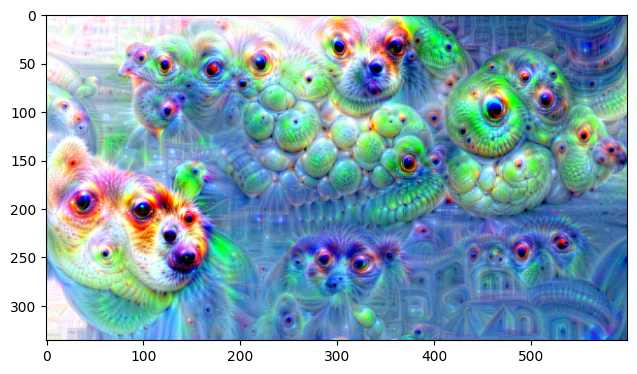

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\Cloud_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu4_3_pyrsize_4_pyrratio_1.8_iter_10_lr_0.09_shift_32_smooth_0.5.jpg



In [28]:
img = deep_dream_static_image(config)  


config['should_display'] = True
dump_path = save_and_maybe_display_image(config, img)
print(f'Saved DeepDream static image to: {os.path.relpath(dump_path)}\n')

**Set the data of DeepDream - Experiments**

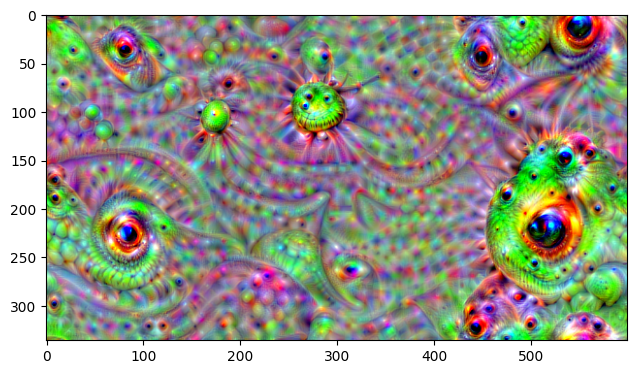

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\rand_noise_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu4_3_pyrsize_4_pyrratio_1.8_iter_10_lr_0.09_shift_32_smooth_0.5.jpg



In [29]:
config['use_noise'] = True 

img = deep_dream_static_image(config)
dump_path = save_and_maybe_display_image(config, img)
print(f'Saved DeepDream static image to: {os.path.relpath(dump_path)}\n')

config['use_noise'] = False  

Exposed layers = ['relu3_3', 'relu4_1', 'relu4_2', 'relu4_3', 'relu5_1']


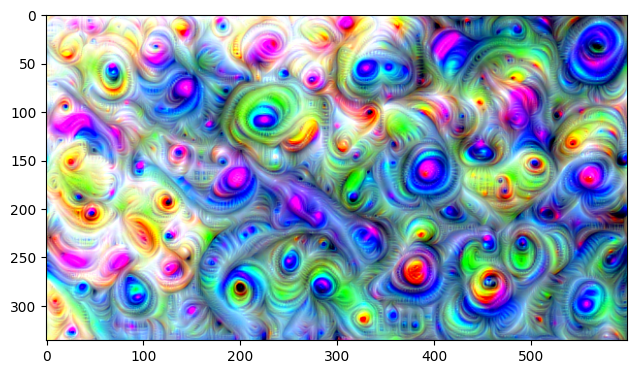

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\Cloud_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu3_3_pyrsize_4_pyrratio_1.8_iter_10_lr_0.09_shift_32_smooth_0.5.jpg



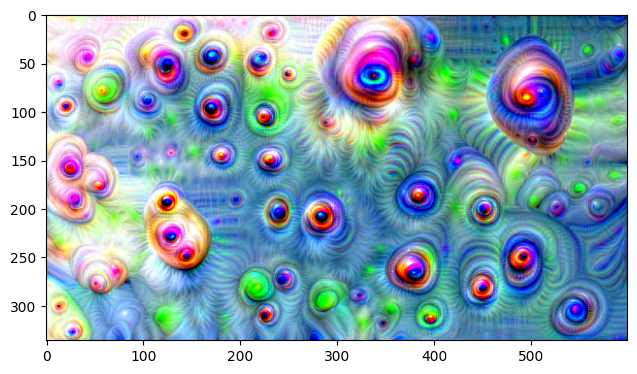

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\Cloud_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu4_1_pyrsize_4_pyrratio_1.8_iter_10_lr_0.09_shift_32_smooth_0.5.jpg



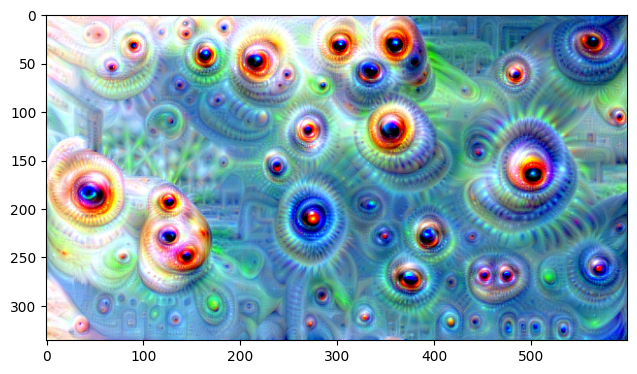

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\Cloud_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu4_2_pyrsize_4_pyrratio_1.8_iter_10_lr_0.09_shift_32_smooth_0.5.jpg



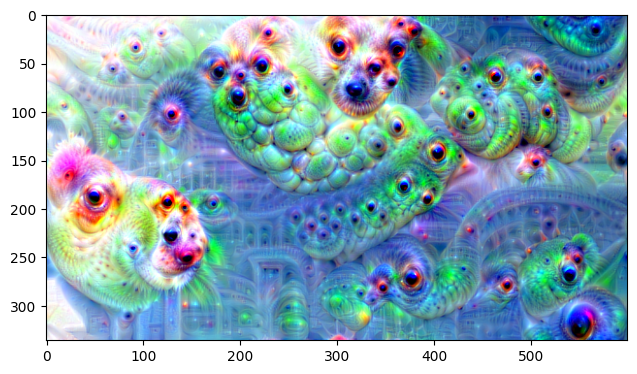

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\Cloud_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu4_3_pyrsize_4_pyrratio_1.8_iter_10_lr_0.09_shift_32_smooth_0.5.jpg



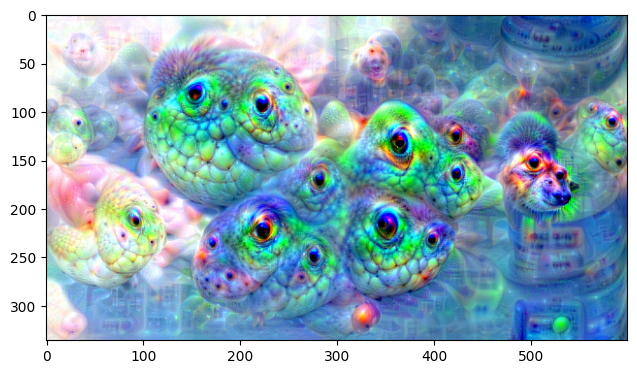

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\Cloud_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu5_1_pyrsize_4_pyrratio_1.8_iter_10_lr_0.09_shift_32_smooth_0.5.jpg



In [30]:
exposed_layers = Vgg16Experimental(pretrained_weights=SupportedPretrainedWeights.IMAGENET.name).layer_names
exposed_layers = exposed_layers[:-3]  
print(f'Exposed layers = {exposed_layers}')

for layer in exposed_layers:
    config['layers_to_use'] = [layer]  

    img = deep_dream_static_image(config)
    dump_path = save_and_maybe_display_image(config, img)
    print(f'Saved DeepDream static image to: {os.path.relpath(dump_path)}\n')

config['layers_to_use'] = ['relu5_3']  

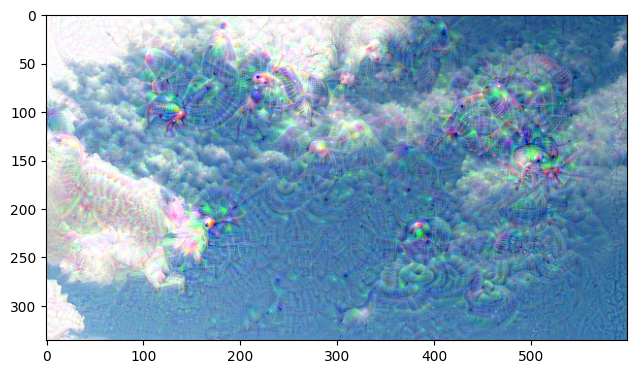

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\Cloud_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu5_3_pyrsize_1_pyrratio_1.8_iter_10_lr_0.09_shift_32_smooth_0.5.jpg



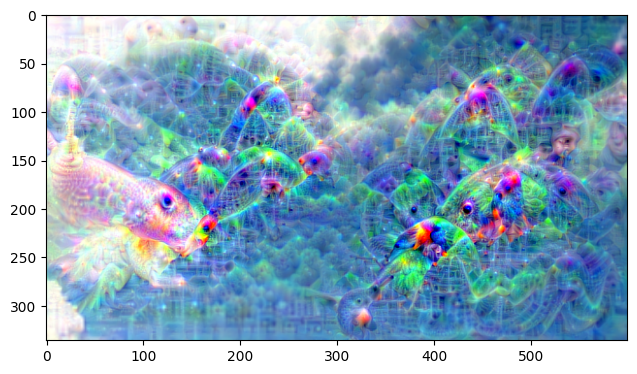

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\Cloud_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu5_3_pyrsize_3_pyrratio_1.8_iter_10_lr_0.09_shift_32_smooth_0.5.jpg



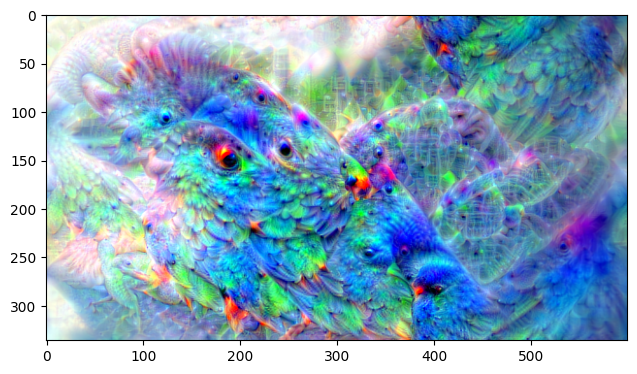

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\Cloud_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu5_3_pyrsize_5_pyrratio_1.8_iter_10_lr_0.09_shift_32_smooth_0.5.jpg



In [31]:
pyramid_sizes = [1, 3, 5]  
config['pyramid_ratio'] = 1.8  

for pyramid_size in pyramid_sizes:
    config['pyramid_size'] = pyramid_size

    img = deep_dream_static_image(config)
    dump_path = save_and_maybe_display_image(config, img)
    print(f'Saved DeepDream static image to: {os.path.relpath(dump_path)}\n')

config['pyramid_size'] = 4  

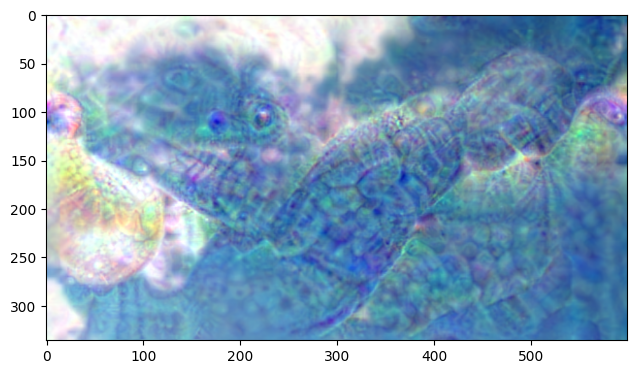

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\Cloud_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu5_3_pyrsize_4_pyrratio_1.8_iter_2_lr_0.09_shift_32_smooth_0.5.jpg



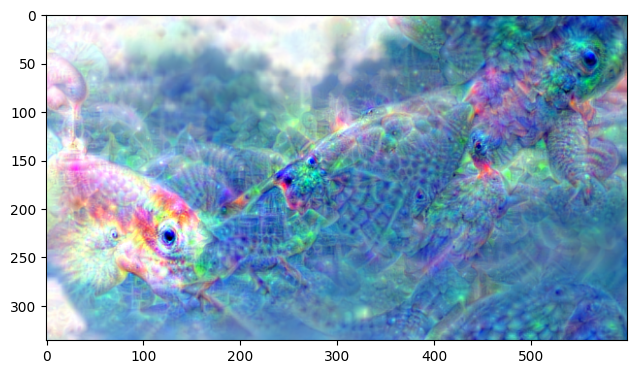

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\Cloud_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu5_3_pyrsize_4_pyrratio_1.8_iter_5_lr_0.09_shift_32_smooth_0.5.jpg



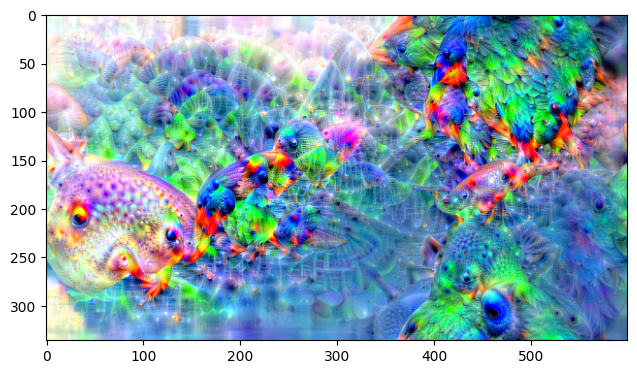

Saved DeepDream static image to: data\out-images\VGG16_EXPERIMENTAL_IMAGENET\Cloud_width_600_model_VGG16_EXPERIMENTAL_IMAGENET_relu5_3_pyrsize_4_pyrratio_1.8_iter_20_lr_0.09_shift_32_smooth_0.5.jpg



In [32]:
num_gradient_ascent_iterations = [2, 5, 20]
config['lr'] = 0.09  

for num_iter in num_gradient_ascent_iterations:
    config['num_gradient_ascent_iterations'] = num_iter

    img = deep_dream_static_image(config)
    dump_path = save_and_maybe_display_image(config, img)
    print(f'Saved DeepDream static image to: {os.path.relpath(dump_path)}\n')

config['num_gradient_ascent_iterations'] = 10  